# Ps2 part 1 ACME
### by [Ying Cai]
The code in this Jupyter notebook was written using Python 2.7.

### Problem 1

In [45]:
from sympy import *
import numpy as np

In [46]:
x = symbols('x')
diff((sin(x)+1)**(sin(cos(x))))

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [47]:
f_1 = lambdify(x, (sin(x)+1)**(sin(cos(x))))

In [48]:
f_dif = lambdify(x, diff((sin(x)+1)**(sin(cos(x)))))

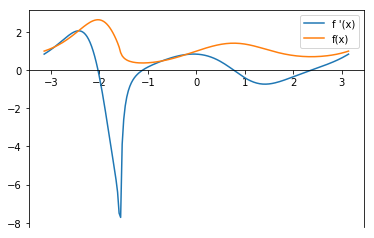

In [49]:
x_points = np.linspace(-np.pi,np.pi,200)
f_calf = f_1(x_points)
f_caldif = f_dif(x_points)

import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure(figsize=(6,4))
plt.plot(x_points, f_caldif, label = "f '(x)")
plt.plot(x_points, f_calf, label = "f(x)")
ax = plt.gca()
ax.spines["bottom"].set_position('zero')
plt.legend()
plt.show()

### problem 2 

In [50]:
def dif_F1(f,x,h):
    return((f(x + h) - f(x))/h)

def dif_B1(f,x,h):
    return ((f(x) - f(x - h))/h)

def dif_C2(f,x,h):
    return ((f(x + h) - f(x - h))/(2.0*h))

def dif_F2(f,x,h):
    return (-3*f(x) + 4.0*f(x + h) - f(x + 2*h))/(2.0*h)

def dif_B2(f,x,h):
    return( (3.0*f(x) - 4.0*f(x - h) + f(x - 2*h))/(2.0*h))

def dif_C4(f,x,h):
    return ((f(x - 2*h) - 8.0*f(x - h) + 8*f(x + h) - f(x + 2*h))/(12.0*h))


Text(0.5,1,u'First order derivative, h = 1')

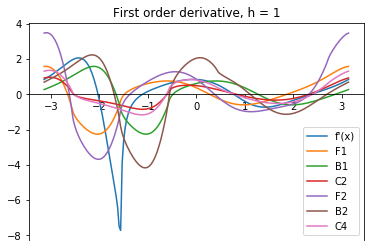

In [51]:
h = 1
f = f_1
% matplotlib inline
plt.plot(x_points, f_caldif, label="f'(x)")
plt.plot(x_points, dif_F1(f, x_points, h), label='F1')
plt.plot(x_points, dif_B1(f, x_points, h), label='B1')
plt.plot(x_points, dif_C2(f, x_points, h), label="C2")
plt.plot(x_points, dif_F2(f, x_points, h), label='F2')
plt.plot(x_points, dif_B2(f, x_points, h), label='B2')
plt.plot(x_points, dif_C4(f, x_points, h), label='C4')
ax = plt.gca()
ax.spines["bottom"].set_position('zero')
plt.legend()
plt.title("First order derivative, h = 1")

Text(0.5,1,u'First order derivative, h = 0.1')

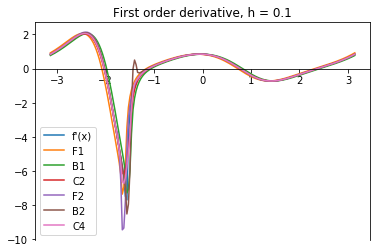

In [52]:
h = 0.1

% matplotlib inline
plt.plot(x_points, f_caldif, label="f'(x)")
plt.plot(x_points, dif_F1(f, x_points, h), label='F1')
plt.plot(x_points, dif_B1(f, x_points, h), label='B1')
plt.plot(x_points, dif_C2(f, x_points, h), label="C2")
plt.plot(x_points, dif_F2(f, x_points, h), label='F2')
plt.plot(x_points, dif_B2(f, x_points, h), label='B2')
plt.plot(x_points, dif_C4(f, x_points, h), label='C4')
ax = plt.gca()
ax.spines["bottom"].set_position('zero')
plt.legend()
plt.title("First order derivative, h = 0.1")

### problem 3

In [53]:
def ae_F1(h):
    x = 1.0
    f = f_1
    return abs(f_dif(x) - dif_F1(f,x,h))

def ae_F2(h):
    x = 1.0
    f = f_1
    return abs(f_dif(x) - dif_F2(f,x,h))

def ae_B1(h):
    x = 1.0
    f = f_1
    return abs(f_dif(x) - dif_B1(f,x,h))

def ae_B2(h):
    x = 1.0
    f = f_1
    return abs(f_dif(x) - dif_B2(f,x,h))

def ae_C2(h):
    x = 1.0
    f = f_1
    return abs(f_dif(x) - dif_C2(f,x,h))

def ae_C4(h):
    x = 1.0
    f = f_1
    return abs(f_dif(x) - dif_C4(f,x,h))

In [54]:
h_logpoints = np.logspace(-8,0,9)

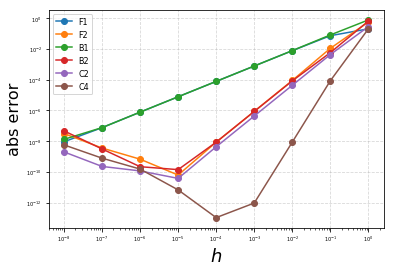

In [55]:

fig = plt.figure(figsize=(6,4))
plt.plot(h_logpoints, ae_F1(h_logpoints),marker='o', label='F1')
plt.plot(h_logpoints, ae_F2(h_logpoints),marker='o', label='F2')
plt.plot(h_logpoints, ae_B1(h_logpoints),marker='o', label='B1')
plt.plot(h_logpoints, ae_B2(h_logpoints),marker='o', label='B2')
plt.plot(h_logpoints, ae_C2(h_logpoints),marker='o', label='C2')
plt.plot(h_logpoints, ae_C4(h_logpoints),marker='o', label='C4')
plt.xscale('log');plt.yscale('log')
plt.xlabel('$h$', fontsize=18);plt.ylabel('abs error', fontsize=16)

plt.tick_params(axis="both", labelsize=5)
plt.legend(loc='upper left', fontsize=8)
plt.grid(ls="--", alpha=0.5)
plt.show()

### problem 4


In [56]:
plane = np.load(r"C:\Users\chxzh\Desktop\persp-model-econ_W19-master\plane.npy")

In [57]:
print plane

[[  7.    56.25  67.54]
 [  8.    55.53  66.57]
 [  9.    54.8   65.59]
 [ 10.    54.06  64.59]
 [ 11.    53.34  63.62]
 [ 12.    52.69  62.74]
 [ 13.    51.94  61.72]
 [ 14.    51.28  60.82]]


In [58]:
import pandas as pd
position = pd.DataFrame(columns=list('txy'))


In [59]:
for i in range(8):
    a = np.deg2rad(plane[i][1])
    b = np.deg2rad(plane[i][2])
    r = pd.DataFrame([[i+7,a*np.tan(b)/(np.tan(b)-np.tan(a)),a*np.tan(b)*np.tan(a)/(np.tan(b)-np.tan(a))]], columns = list('txy'))
    position = position.append(r)

In [60]:
position = position.set_index('t')
print position

           x         y
t                     
7   2.574675  3.853274
8   2.628297  3.828488
9   2.681703  3.801556
10  2.737160  3.775686
11  2.790344  3.748993
12  2.839398  3.725894
13  2.897326  3.700414
14  2.949213  3.678587


In [61]:
def speed(t):
    if t in range(8,14):
        dx_t = (position.loc[t + 1][0] - position.loc[t - 1][0])/2.0
        dy_t = (position.loc[t + 1][1] - position.loc[t - 1][1])/2.0
        
    elif t == 7:
        dx_t = (position.loc[t + 1][0] - position.loc[t][0])
        dy_t = (position.loc[t + 1][1] - position.loc[t][1])
    
    else:
        dx_t = (position.loc[t][0] - position.loc[t - 1][0])
        dy_t = (position.loc[t][1] - position.loc[t - 1][1])
        
    return (dx_t**2 + dy_t**2)**0.5   

In [62]:
df_speed = pd.DataFrame(columns = ["t","speed"])
for t in range(7,15):
    r = pd.DataFrame([[t,speed(t)]], columns = ["t","speed"])
    df_speed = df_speed.append(r)
df_speed = df_speed.set_index("t")

In [63]:
print df_speed

       speed
t           
7   0.059073
8   0.059434
9   0.060497
10  0.060344
11  0.056859
12  0.058747
13  0.059785
14  0.056291


### problem 5

In [64]:
def Japprox(f,vx,h = 0.1):
    dim_f = len(f)
    dim_x = len(vx)
    I = np.identity(dim_x)
    Jmatrix = zeros(dim_f, dim_x)
    for i, sub_f in enumerate(f):
        for j,s in enumerate(vx):
            func = lambdify((x,y),sub_f,"numpy")
            forward = vx + h*I[:,j]
            back = vx - h*I[:,j]
            Jmatrix[i,j] = (func(forward[0],forward[1])-func(back[0],back[1]))/(2.0*h)
    return Jmatrix
    
    

In [65]:
import random
x = symbols('x')
y = symbols('y')
f_test = [x**2,x**3-y]
x_test = [random.randint(1,10),random.randint(1,10)]
print f_test,x_test,Japprox(f_test,x_test)

[x**2, x**3 - y] [9, 6] Matrix([[17.9999999999999, 0.0], [243.009999999999, -1.00000000000023]])


### problem 7

In [66]:
import time
import autograd.numpy as np
from autograd import grad

def f_1(x):
    return ((np.sin(x)+1)**(np.sin(np.cos(x))))

def f_dif(x):
    return (-np.log(np.sin(x) + 1)*np.sin(x)*np.cos(np.cos(x)) + np.sin(np.cos(x))*np.cos(x)/(np.sin(x) + 1))*(np.sin(x) + 1)**np.sin(np.cos(x))

ag_dif = grad(f_1)

def appr_time(n):

    time_sp = np.zeros(n)
    time_c4 = np.zeros(n)
    time_ag = np.zeros(n)
    abser_sp = (1e-18)*np.ones(n)
    abser_c4 = np.zeros(n)
    abser_ag = np.zeros(n)
    for i in range(n):
        
        x = np.random.uniform(low=-np.pi, high=np.pi)
        sp_start = time.clock()
        val_sp = f_dif(x)
        sp_end = time.clock()
        time_sp[i] = sp_end - sp_start
        
        c4_start = time.clock()
        val_c4 = dif_C4(f_1,x,h = 0.001)
        c4_end = time.clock()
        time_c4[i] = (c4_end - c4_start)       
        abser_c4[i] = abs(val_c4 - val_sp)
        
        ag_start = time.clock()
        val_ag = ag_dif(x)
        ag_end = time.clock()
        time_ag[i] = ag_end - ag_start
        abser_ag[i] = abs(val_ag - val_sp)
        
    return time_sp,time_c4,time_ag,abser_sp,abser_c4,abser_ag

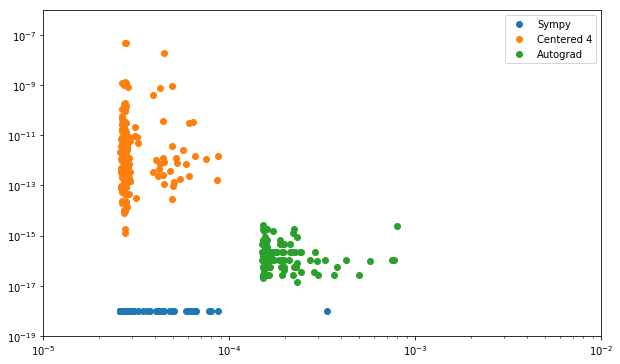

In [67]:
time_sp,time_c4,time_ag,abser_sp,abser_c4,abser_ag = appr_time(200)

fig = plt.figure(figsize=(10,6))
plt.scatter(time_sp,abser_sp,label = "Sympy")
plt.scatter(time_c4,abser_c4,label = "Centered 4")
plt.scatter(time_ag,abser_ag,label = "Autograd")
plt.yscale('log');plt.xscale('log')
plt.legend()
plt.xlim(1.0e-5,1.0e-2);plt.ylim(1.0e-19,1.0e-6)
plt.show()